In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [2]:
# check for na values
pylab.show()
df_bitcoin_price = pd.read_csv('BitcoinStockMarketHistoricalData_2014_2021.csv')
df_bitcoin_price.head(10)



,Date,Open,High,Low,Close,Adj Close,Volume
0,9/17/2014,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,9/18/2014,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,9/19/2014,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,9/20/2014,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,9/21/2014,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
5,9/22/2014,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0
6,9/23/2014,402.092010,441.557007,396.196991,435.790985,435.790985,45099500.0
7,9/24/2014,435.751007,436.112000,421.131989,423.204987,423.204987,30627700.0
8,9/25/2014,423.156006,423.519989,409.467987,411.574005,411.574005,26814400.0
9,9/26/2014,411.428986,414.937988,400.009003,404.424988,404.424988,21460800.0


In [4]:
# find out which rows have na values
print(df_bitcoin_price['Date'].isnull().values.any())
print(df_bitcoin_price['Open'].isnull().values.any())
print(df_bitcoin_price['High'].isnull().values.any())
print(df_bitcoin_price['Low'].isnull().values.any())
print(df_bitcoin_price['Close'].isnull().values.any())
print(df_bitcoin_price['Adj Close'].isnull().values.any())
print(df_bitcoin_price['Volume'].isnull().values.any())

nan_rows_open = df_bitcoin_price[df_bitcoin_price['Open'].isnull()]
print(nan_rows_open)
nan_rows_high = df_bitcoin_price[df_bitcoin_price['High'].isnull()]
print(nan_rows_high)
nan_rows_low = df_bitcoin_price[df_bitcoin_price['Low'].isnull()]
print(nan_rows_low)
nan_rows_close = df_bitcoin_price[df_bitcoin_price['Close'].isnull()]
print(nan_rows_close)

# It turns out that in the dataset, there are 4 days where all the data is missing.
# Since there are only 4 rows with missing values and the data is easily accessble to the internet,
# I searched for it online and filled them in.
df_bitcoin_price.at[2039,'Open'] = 7116.55
df_bitcoin_price.at[2039,'High'] = 7167.18
df_bitcoin_price.at[2039,'Low'] = 7050.33
df_bitcoin_price.at[2039,'Close'] = 7096.18
df_bitcoin_price.at[2039,'Adj Close'] = 0
df_bitcoin_price.at[2039,'Volume'] = 32513423567

df_bitcoin_price.at[2214,'Open'] = 10927.91
df_bitcoin_price.at[2214,'High'] = 11102.67
df_bitcoin_price.at[2214,'Low'] = 10846.85
df_bitcoin_price.at[2214,'Close'] = 11064.46
df_bitcoin_price.at[2214,'Adj Close'] = 0
df_bitcoin_price.at[2214,'Volume'] = 22799117613

df_bitcoin_price.at[2217,'Open'] = 11392.64
df_bitcoin_price.at[2217,'High'] = 11698.47
df_bitcoin_price.at[2217,'Low'] = 11240.69
df_bitcoin_price.at[2217,'Close'] = 11555.36
df_bitcoin_price.at[2217,'Adj Close'] = 0
df_bitcoin_price.at[2217,'Volume'] = 26163972642

df_bitcoin_price.at[2218,'Open'] = 11548.72
df_bitcoin_price.at[2218,'High'] = 11548.98
df_bitcoin_price.at[2218,'Low'] = 11321.22
df_bitcoin_price.at[2218,'Close'] = 11425.90
df_bitcoin_price.at[2218,'Adj Close'] = 0
df_bitcoin_price.at[2218,'Volume'] = 24241420251

# since we dont really care about the adjusted close price when we already have close price,
# we can delete that column
df_bitcoin_price = df_bitcoin_price.drop('Adj Close',axis=1)

df_bitcoin_price.head(10)

df_bitcoin_price.to_csv(r"/Users/lingfengcao/Leyao/scholarship/BitcoinHistoryCleaned.csv")

False
False
False
False
False


KeyError: 'Adj Close'

In [5]:
df_bitcoin_price.shape

(2361, 6)

In [6]:
df_news = pd.read_csv('BitcoinNews_2021_1.csv')
df_news.shape
df_news.head(10)


,Date,Source,Title,Headline
0,2/7/2021,bbc-news,FCA warning over risky TikTok trading tips,Some TikTok creators have been giving investme...
1,2/8/2021,engadget,Tesla buys in Bitcoin will soon accept it as p...,Elon Musk cryptocurrency hype more than just i...
2,2/8/2021,techcrunch,Tesla buys B in bitcoin may accept the cryptoc...,Today filing Tesla disclosed that acquired bil...
3,2/8/2021,None,Impeachment Trial Child Tax Credit Bitcoin You...,Here what need know
4,2/8/2021,techcrunch,Daily Crunch DoorDash acquires Chowbotics,DoorDash acquires salad making robotics startu...
5,2/8/2021,reuters,FOREX Dollar steadies after U S jobs related l...,Dollar index little changed after Friday payro...
6,2/8/2021,None,Tesla invests B in bitcoin Yahoo Finance,Tesla invests bitcoin Yahoo Finance Musk Tesla...
7,2/8/2021,reuters,How Musk teased cryptocurrencies over the year...,Elon Musk Tesla announced Monday invested bill...
8,2/8/2021,reuters,Musk s Bitcoin investment follows months of Tw...,Tesla billion Bitcoin investment unveiled Mond...
9,2/8/2021,reuters,Bitcoin jumps to record high on Tesla investme...,Bitcoin jumped more than Monday record high af...


/Users/lingfengcao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Time (year)')

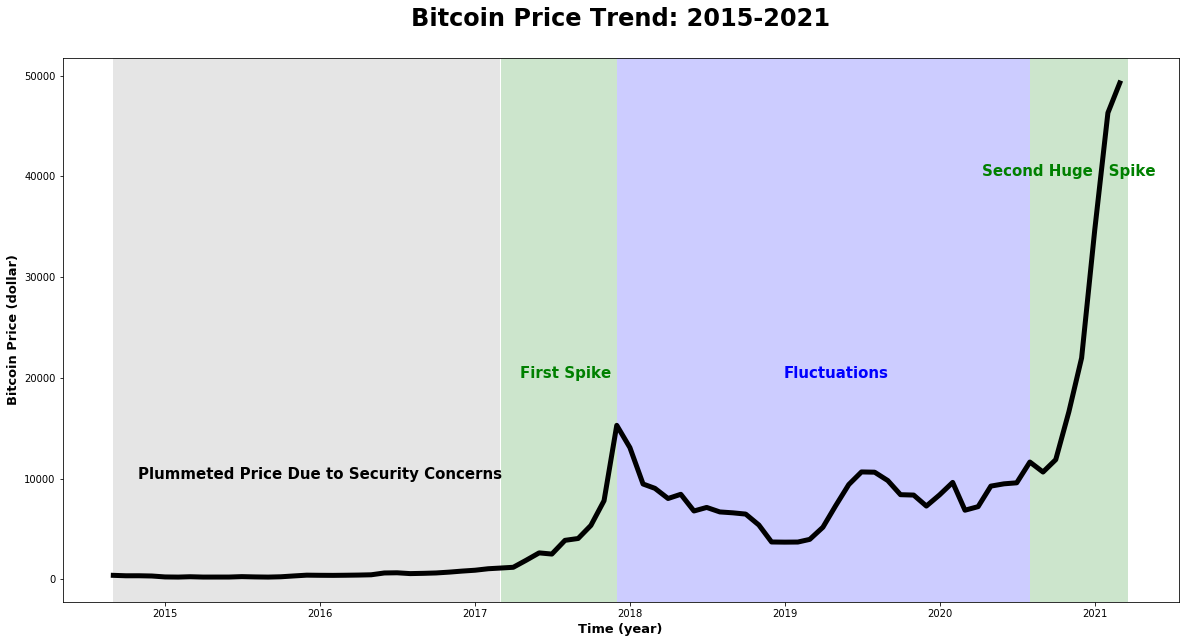

In [6]:
## plot of bitcoin price all time 
df_price_trend_alltime = df_bitcoin_price[['Date','Close','Volume']]
df_price_trend_alltime['Date'] = pd.to_datetime(df_price_trend_alltime['Date'])
df_price_trend_alltime = df_price_trend_alltime.set_index('Date')
df_price_trend_alltime = df_price_trend_alltime.resample('MS').mean()
fig, ax = plt.subplots(figsize=(20, 10), facecolor="w")
ax.plot(df_price_trend_alltime['Close'], color = 'black', lw=5)
ax.set_title("Bitcoin Price Trend: 2015-2021", fontsize=24, fontweight="bold", pad=32,color='black')
ax.axvspan(datetime(2014,9,1), datetime(2017,3,1), fc="grey", alpha=0.2)
font_trend = {"fontsize": 15, "ha":"center"}
ax.text(datetime(2016,1,1), 10000, "Plummeted Price Due to Security Concerns", color="black", fontdict=font_trend,fontweight="bold")
ax.axvspan(datetime(2017,3,2), datetime(2017,12,1), fc="green", alpha=0.2)
ax.text(datetime(2017,8,2), 20000, "First Spike", color="green", fontdict=font_trend,fontweight="bold")
ax.axvspan(datetime(2017,12,2), datetime(2020,8,1), fc="blue", alpha=0.2)
ax.text(datetime(2019,5,2), 20000, "Fluctuations", color="blue", fontdict=font_trend,fontweight="bold")
ax.axvspan(datetime(2020,8,2), datetime(2021,3,20), fc="green", alpha=0.2)
ax.text(datetime(2020,11,1), 40000, "Second Huge   Spike", color="green", fontdict=font_trend,fontweight="bold")
plt.ylabel('Bitcoin Price (dollar)',size=13,fontweight="bold")
plt.xlabel('Time (year)',size=13,fontweight="bold")

Text(0.5, 1.0, 'Bitcoin Daily High and Daily Low Price Difference')

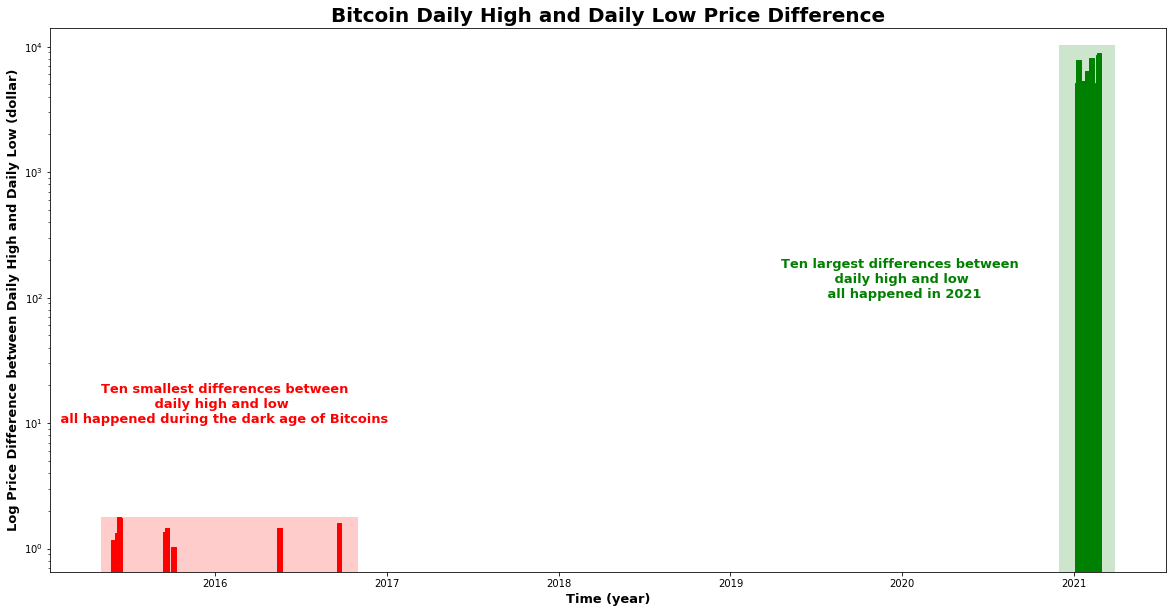

In [12]:
## biggest gain and loss days (difference between high and low):
## gain:
df_bitcoin_price['Difference'] = df_bitcoin_price['High'] - df_bitcoin_price['Low']
bottom_10_daily_diff = df_bitcoin_price.sort_values(by=['Difference']).head(10)
top_10_daily_diff = df_bitcoin_price.sort_values(by=['Difference'],ascending=False).head(10)

## 
bottom_10_daily_diff.reset_index(drop=True, inplace=True)
top_10_daily_diff.reset_index(drop=True, inplace=True)
diff_top_and_bot = pd.concat([bottom_10_daily_diff,top_10_daily_diff],ignore_index=True)
dates_top_and_bot = [datetime.strptime(d,'%m/%d/%Y').date() for d in diff_top_and_bot['Date']]

diff_top_and_bot = pd.concat([bottom_10_daily_diff,top_10_daily_diff],ignore_index=True)

plt.figure(figsize=(20,10)) 

barlist = plt.bar(dates_top_and_bot,diff_top_and_bot['Difference'],width=10)
for i in range(0,10):
    barlist[i].set_color('r')
for i in range(10,20):
    barlist[i].set_color('green')
font_trend_2 = {"fontsize": 13, "ha":"center"}
plt.text(datetime(2016,1,15), 10, '  Ten smallest differences between \n daily high and low \n all happened during the dark age of Bitcoins', color="red", fontdict=font_trend_2,fontweight="bold")
plt.text(datetime(2020,1,1), 100, 'Ten largest differences between \n daily high and low \n all happened in 2021', color = "green", fontdict=font_trend_2,fontweight="bold")
plt.axvspan(datetime(2015,5,2), datetime(2016,10,30), ymax=0.1,fc="red", alpha=0.2)
plt.axvspan(datetime(2020,12,1), datetime(2021,3,30), ymax=0.97,fc="green", alpha=0.2)
plt.yscale("log")
plt.ylabel('Log Price Difference between Daily High and Daily Low (dollar)', size=13,fontweight="bold")
plt.xlabel('Time (year)',size=13,fontweight="bold")

plt.title('Bitcoin Daily High and Daily Low Price Difference',size=20,fontweight="bold")


In [26]:
# avg monthly volume, difference
df_monthly_volume = df_bitcoin_price[['Date','Volume']]
df_monthly_volume.head()
df_monthly_volume['Date']=pd.to_datetime(df_monthly_volume['Date'])
df_monthly_avg_volume = df_monthly_volume.groupby(pd.PeriodIndex(df_monthly_volume['Date'], freq="M"))['Volume'].mean().reset_index()
#df_monthly_avg_volume = df_monthly_avg_volume.to_frame()
df_monthly_avg_volume.head()



/Users/lingfengcao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,Volume
0,2014-09,2.934864e+07
1,2014-10,2.912885e+07
2,2014-11,2.199111e+07
3,2014-12,1.784201e+07
4,2015-01,3.544555e+07


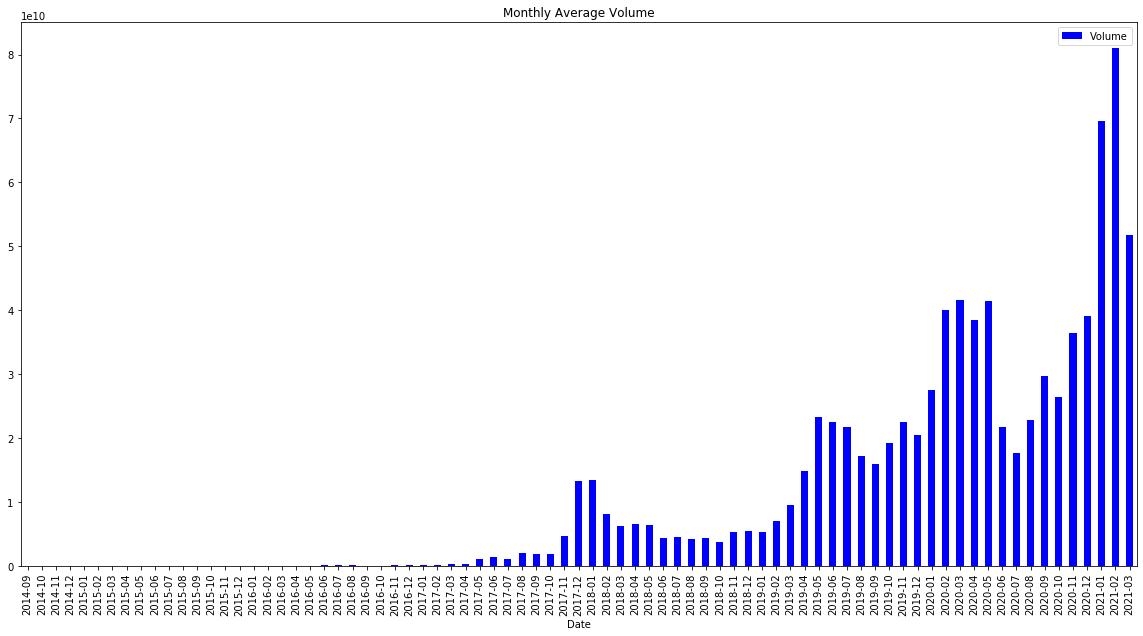

In [40]:

df_monthly_avg_volume.set_index('Date').plot(kind='bar',figsize=(20,10),color='blue',title='Monthly Average Volume')


In [12]:
## calculate daily return as percentage of price change
df_prices = df_bitcoin_price[['Date','Open']]

df_prices['daily_return'] = df_prices.Open.pct_change(1) # 1 for ONE DAY lookback
df_prices['daily_return_percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df_prices['daily_return']], index = df_prices.index)
df_prices.head()
df_prices.to_csv('DailyReturn.csv')

/Users/lingfengcao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/lingfengcao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
## cleaning for the news data
## since headline contains more detailed context than the titles, we will be using headlines for analysis
df_news = df_news.drop_duplicates(keep='first')
df_news.shape
df_news.to_csv('BitcoinNewsCleaned.csv')


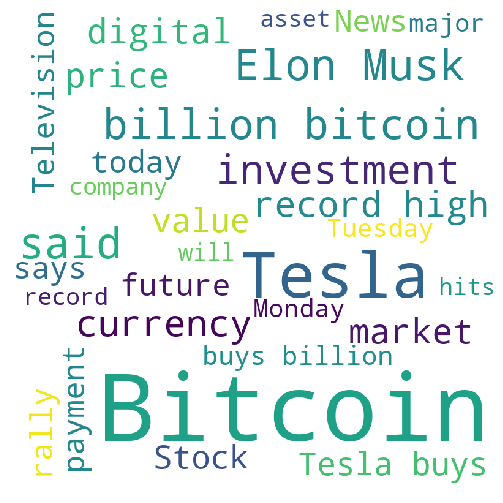

In [10]:


text3 = ' '.join(df_news['Headline'])
stopwords = list(STOPWORDS)+['CNBC','cryptocurrency','crypto']
wordcloud2 = WordCloud(width = 800, height = 800,max_words=30,stopwords=stopwords,background_color ='white').generate(text3)
# Generate plot
plt.figure(figsize = (16,9))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [11]:
## create a label column for the text data, indicating whether bitcoin price went up (1) or down (0) on that day
df_news_labeled = pd.read_csv('BitcoinNewsCleaned_WithLabel.csv')
df_news_labeled= df_news_labeled.drop(['Unnamed: 0'],axis=1)
df_news_labeled= df_news_labeled.drop(['Source'],axis=1)
df_news_labeled= df_news_labeled.drop(['Title'],axis=1)
df_news_labeled.head()

,Date,Label,Headline
0,2/7/21,0,Some TikTok creators have been giving investme...
1,2/8/21,1,Elon Musk cryptocurrency hype more than just i...
2,2/8/21,1,Today filing Tesla disclosed that acquired bil...
3,2/8/21,1,Here what need know
4,2/8/21,1,DoorDash acquires salad making robotics startu...


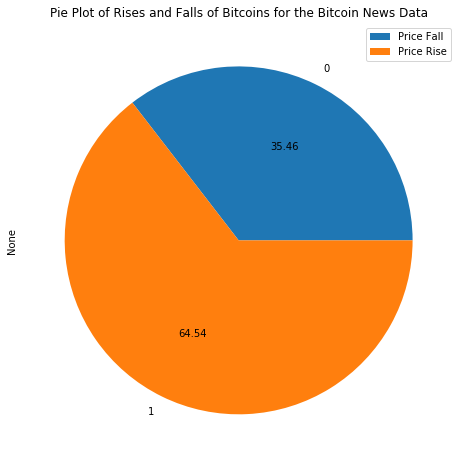

In [12]:

df_news_labeled.Label= df_news_labeled.Label.map(str)
type(df_news_labeled.Label[0])
fig, ax = plt.subplots()
df_news_labeled.groupby('Label').size().plot(kind='pie', legend=True,figsize=(8,8),title='Pie Plot of Rises and Falls of Bitcoins for the Bitcoin News Data', autopct='%.2f',ax=ax)
ax.legend(['Price Fall','Price Rise'])
## based on the pie plot, we can see that our data is not highly imbalanced

[[ 2 12]
 [ 7 22]]
0.5581395348837209


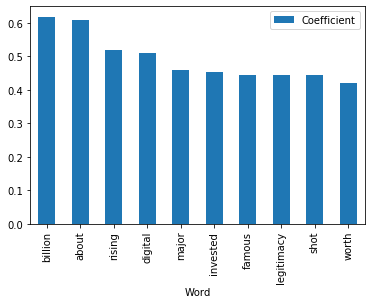

In [37]:
## now lets build a logistic regression model based on the text data
## this is the basic model with countVectorizer
basicvectorizer = CountVectorizer()
features = basicvectorizer.fit_transform(df_news_labeled['Headline']).toarray()
Y_basic = df_news_labeled['Label']

X_train, X_test, y_train, y_test = train_test_split(features, Y_basic, test_size=0.3,random_state=13)

basicmodel = LogisticRegression()
basicmodel = basicmodel.fit(X_train,y_train)
predictions = basicmodel.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
score =accuracy_score(y_test,predictions)
print(score)


## lets look at feature importance


basicwords = basicvectorizer.get_feature_names()
basiccoeffs = abs(basicmodel.coef_[0])
coeffdf = pd.DataFrame({'Word' : basicwords, 
                        'Coefficient' : basiccoeffs})
coeffdf = coeffdf.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
coeffdf.head(10)
#feature_importance = abs(basicmodel.coef_[0])
#feature_importance = 100.0 * (feature_importance / feature_importance.max())
#sorted_idx = np.argsort(feature_importance)
#pos = np.arange(sorted_idx.shape[0]) + .5

#featfig = plt.figure()
#featax = featfig.add_subplot(1, 1, 1)
#featax.barh(pos, feature_importance[sorted_idx], align='center')
#featax.set_yticks(pos)
#featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
#featax.set_xlabel('Relative Feature Importance')

#plt.tight_layout()   
#plt.show()
coeffdf.head(10).plot.bar(x='Word',y='Coefficient')

0.6511627906976745
[[ 1 13]
 [ 2 27]]


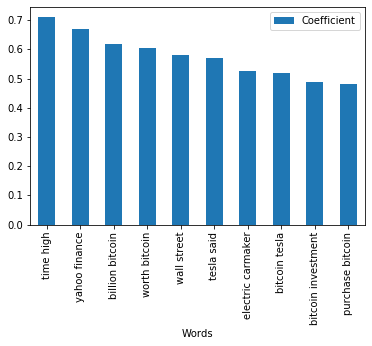

In [52]:
## lets build another model using TFIDF Vectorizer
TFIDFvectorizer = TfidfVectorizer(min_df= 3, stop_words="english",ngram_range = (2, 2))
final_features = TFIDFvectorizer.fit_transform(df_news_labeled['Headline']).toarray()
final_features.shape
Y = df_news_labeled['Label']
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(final_features, Y, test_size=0.3,random_state=13)

advancedmodel = LogisticRegression()
advancedmodel = advancedmodel.fit(X_train_tfidf, y_train_tfidf)
preds2 = advancedmodel.predict(X_test_tfidf)
acc2=accuracy_score(y_test_tfidf , preds2)

print(acc2)
print(confusion_matrix(y_test_tfidf, preds2))


advwords = TFIDFvectorizer.get_feature_names()
advcoeffs = abs(advancedmodel.coef_[0])
advcoeffdf = pd.DataFrame({'Words' : advwords, 
                        'Coefficient' : advcoeffs})
advcoeffdf = advcoeffdf.sort_values(['Coefficient', 'Words'], ascending=[0, 1])
advcoeffdf.head(10).plot.bar(x='Words',y='Coefficient')

[[22  7]
 [12  2]]


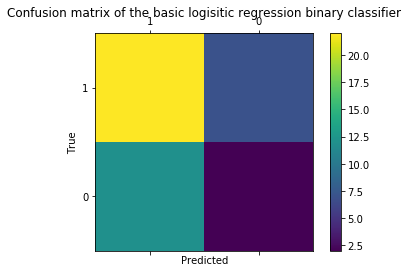

In [42]:
from sklearn.metrics import confusion_matrix

labels = ['1', '0']
cm_2 = confusion_matrix(y_test, predictions, labels)
print(cm_2)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_2)
plt.title('Confusion matrix of the basic logisitic regression binary classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[[27  2]
 [13  1]]


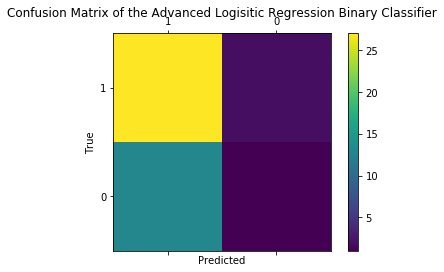

In [48]:
cm_3 = confusion_matrix(y_test, preds2, labels)
print(cm_3)
fig = plt.figure()
ax = fig.add_subplot(111)
cax2 = ax.matshow(cm_3)
plt.title('Confusion Matrix of the Advanced Logisitic Regression Binary Classifier')
fig.colorbar(cax2)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()